<a href="https://colab.research.google.com/github/mrxsierra/da_flask-docker/blob/main/fraud_detection_acrredian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Load the data from "/content/Fraud.csv", preprocess it, and perform an analysis and Develop **Predictive Fraud Detection model** for X Finacial Company.

## Problem Understanding

### Business Context


- This case requires trainees to develop a model for **predicting fraudulent transactions** for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having **6362620 rows and 10 columns**.

- Candidates can use whatever method they wish to develop their machine learning model. Following usual model development procedures, ***the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment.***

- We recommend you **spend time on both fine-tuning and interpreting the results** of your machine learning model.

### Candidate Expectations


Your task is to execute the process for proactive detection of fraud while answering following
questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

### Data Description


- **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- **amount** - amount of the transaction in local currency.

- **nameOrig** - customer who started the transaction

- **oldbalanceOrg** - initial balance before the transaction

- **newbalanceOrig** - new balance after the transaction

- **nameDest** - customer who is the recipient of the transaction

- **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

- **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Load data

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


### EXTRA: For Collecting Data on Collab

In [ ]:
# Collab Specific
!pip install gdown

In [ ]:
import gdown
import pandas as pd

# Google Drive file ID extracted from the link
file_id = '1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV'
output = 'Fraud.csv'

# Download the file using the file ID
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

# Load the data into a pandas DataFrame
df = pd.read_csv(output)

# Display the first 5 rows
display(df.head())

Downloading...
From (original): https://drive.google.com/uc?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV
From (redirected): https://drive.google.com/uc?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&confirm=t&uuid=c2723f2c-e63a-475b-94c2-ca1dcc9e56ae
To: /content/Fraud.csv
100%|██████████| 494M/494M [00:22<00:00, 22.3MB/s]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
import os

# Verifying Data Integrity
file_path = "/content/Fraud.csv"
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 * 1024)

print(f"The size of the file is: {file_size_mb:.2f} MB")

The size of the file is: 470.67 MB


## Importing

**Reasoning**:
Import pandas and load the CSV file into a DataFrame, then display the first 5 rows to verify the data loading.



In [ ]:
import pandas as pd

data = pd.read_csv("/content/Fraud.csv")
df = data.copy(deep=True)
display(df.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


## Explore data


### Domain Specific Context and Research Notes
what each column means and some points to consider for data correctness and potential logical errors:


- **step**: Represents a unit of time, which is 1 hour in this dataset. The maximum step is 744, representing 30 days. You might want to check if the steps are sequential and if there are any unusual gaps or jumps in the time series.
- **type**: The type of transaction. The possible values are CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER. You can verify if there are any unexpected transaction types in the dataset.

    > `Here are the different types and what they generally represent`:

    - **CASH-IN**: This type represents transactions where money is deposited into an account.
    CASH-OUT: This type represents transactions where money is withdrawn from an account.
    - **DEBIT**: This type represents transactions where funds are taken directly from a bank account, typically for purchases or payments.
    - **PAYMENT**: This type represents transactions where money is transferred from one account to another, usually for goods or services.
    - **TRANSFER**: This type represents transactions where money is moved between two accounts. In the context of this dataset, fraudulent behavior often involves transfers to another account before cashing out.

- **amount**: The amount of the transaction in local currency. You should check for unusually large or small amounts, especially in relation to the transaction type and account balances.
- **nameOrig**: The customer who initiated the transaction. These are typically customer IDs.
- **oldbalanceOrg**: The balance of the originating customer's account before the transaction. A logical check would be to ensure that for CASH-OUT and TRANSFER transactions, oldbalanceOrg is greater than or equal to amount. For PAYMENT and DEBIT, oldbalanceOrg should be greater than or equal to amount. For CASH-IN, oldbalanceOrg plus amount should equal newbalanceOrig (considering potential fees or other factors not in the data).
- **newbalanceOrig**: The balance of the originating customer's account after the transaction. A logical check would be to see if oldbalanceOrg minus amount (for CASH-OUT, TRANSFER, PAYMENT, DEBIT) or oldbalanceOrg plus amount (for CASH-IN) roughly equals newbalanceOrig. Discrepancies could indicate errors or other factors.
- **nameDest**: The customer who is the recipient of the transaction. Note that recipients starting with 'M' are Merchants and have no balance information (oldbalanceDest and newbalanceDest are always 0 for merchants). You should verify this pattern for merchant transactions.
- **oldbalanceDest**: The balance of the recipient customer's account before the transaction. For non-merchant recipients, you might check if oldbalanceDest plus amount (for CASH-IN, TRANSFER) roughly equals newbalanceDest. For PAYMENT and DEBIT, the destination balance might not change, or the logic could be different depending on the transaction type.
- **newbalanceDest**: The balance of the recipient customer's account after the transaction. Similar to newbalanceOrig, check the logical consistency with oldbalanceDest and amount based on the transaction type.
- **isFraud**: This is the target variable, indicating whether the transaction is fraudulent (1) or not (0). This column is marked as the transactions made by fraudulent agents in the simulation.
- **isFlaggedFraud**: This flag indicates illegal attempts to transfer more than 200,000 in a single transaction. You can verify if all transactions with isFlaggedFraud = 1 have an amount greater than 200,000.

**Potential Logical Errors to Check**:

- **Balance Consistency**: As mentioned above, the most common logical errors would be inconsistencies between oldbalanceOrg, newbalanceOrig, amount, oldbalanceDest, and newbalanceDest based on the type of transaction.
Merchant Balances: Confirm that oldbalanceDest and newbalanceDest are always 0 for transactions where nameDest starts with 'M'.
- **isFlaggedFraud Logic**: Verify if the isFlaggedFraud flag is correctly applied based on the amount threshold of 200,000.

### Subtask: EDA
Perform initial data exploration to understand the structure, identify missing values, and get basic statistics.

**Reasoning**:
Perform initial data exploration by displaying the shape, data types, missing values, and descriptive statistics of the DataFrame.



In [ ]:
print("Shape of the DataFrame:")
print(df.shape)

print("\nData types of each column:")
print(df.dtypes)

print("\nNumber of missing values in each column:")
print(df.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
display(df.describe())

Shape of the DataFrame:
(6362620, 11)

Data types of each column:
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Number of missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Descriptive statistics for numerical columns:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# transaction flagged or isfraud
df.isFlaggedFraud.value_counts(), df.isFraud.value_counts()

(isFlaggedFraud
 0    6362604
 1         16
 Name: count, dtype: int64,
 isFraud
 0    6354407
 1       8213
 Name: count, dtype: int64)

<Axes: title={'center': "Imbalance In Dependable variable 'isFraud'"}, ylabel='count'>

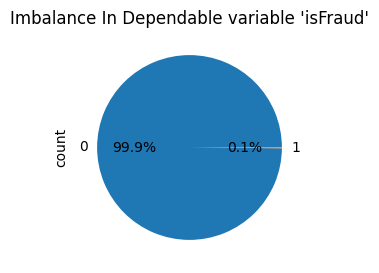

In [ ]:
# Imabalance in dataset for predicatant y(isFraud)'s value 0 and 1.
df.isFraud.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(3, 3), title="Imbalance In Dependable variable 'isFraud'")

> **`Insight: `** only few dataset is `isflaggedfraud` (**16**), While dependent variable `isFraud` has `High Imbalance` only **0.1%** is marked `isFraud`.

> **`Note: `** This can result in biased model, need careful evalution.

In [ ]:
# Display transactions where isFlaggedFraud is 1
display(df[df.isFlaggedFraud == 1].amount.value_counts())

,count
amount,
10000000.00,3
4953893.08,1
1343002.08,1
536624.41,1
4892193.09,1
9585040.37,1
3576297.10,1
353874.22,1
2542664.27,1


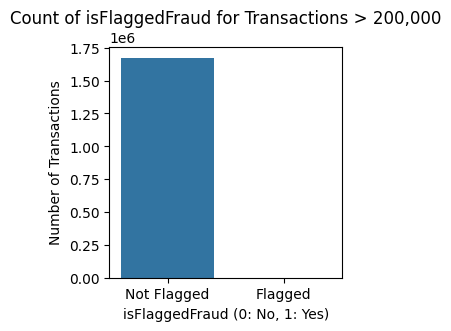

Value counts of isFlaggedFraud for transactions > 200,000:
isFlaggedFraud
0    1673554
1         16
Name: count, dtype: int64


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter transactions where amount is greater than 200,000
high_amount_transactions = df[df.amount > 200000]

# Create a count plot of isFlaggedFraud for these transactions
plt.figure(figsize=(3, 3))
sns.countplot(x='isFlaggedFraud', data=high_amount_transactions)
plt.title('Count of isFlaggedFraud for Transactions > 200,000')
plt.xlabel('isFlaggedFraud (0: No, 1: Yes)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Not Flagged', 'Flagged'])
plt.show()

# Display the value counts as well for clarity
print("Value counts of isFlaggedFraud for transactions > 200,000:")
print(high_amount_transactions['isFlaggedFraud'].value_counts())

**`Insight: `** Out of ***25%*** transcation that are grater than **`200,000`** Only **`16`** **isFlaggedFraud**, Will be less helpful **independentely**, for trainning model. It can result in biased.

## Preprocess data

### Subtask:
Handle missing values, encode categorical features, and scale numerical features as needed for analysis.


**Reasoning**:
Handle the missing value, encode the categorical feature, and scale the numerical features as per the instructions.



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Handle the missing value in the `nameDest` column
# The isnull().sum() output shows 1 missing value in nameDest, oldbalanceDest, newbalanceDest, isFraud, and isFlaggedFraud
# Since the number of missing values is very small compared to the total number of rows, we can drop these rows.
df.dropna(subset=['nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'], inplace=True)

# Separate target variable before preprocessing
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

# Identify categorical and numerical features
categorical_features = ['type']
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough' # Keep other columns (like nameOrig, nameDest)
)

# Create a preprocessing pipeline
preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing
X_processed = preprocess_pipeline.fit_transform(X)

print("Shape of processed features:", X_processed.shape)

Shape of processed features: (6362620, 13)


## Analyze data

### Subtask:
Perform exploratory data analysis, such as visualizing distributions, relationships between features, and potential fraud patterns.


**Reasoning**:
Create the requested plots and calculate the correlation matrix to perform exploratory data analysis as requested.



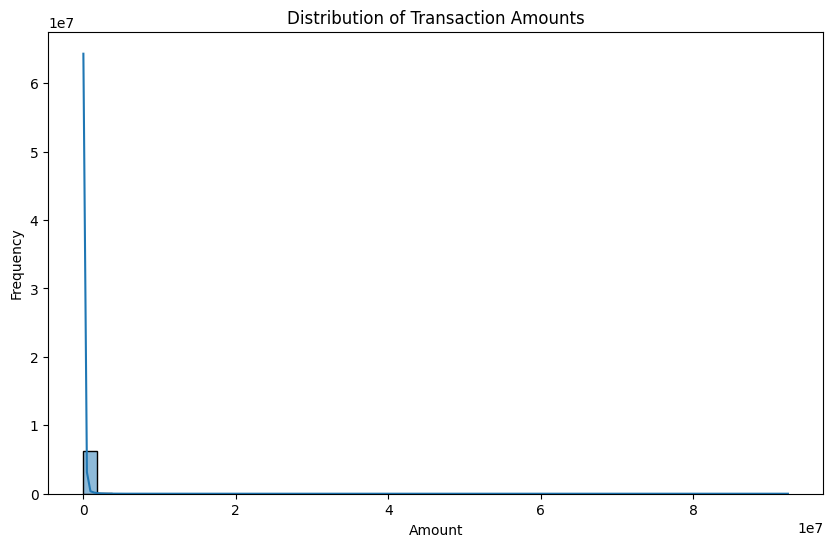

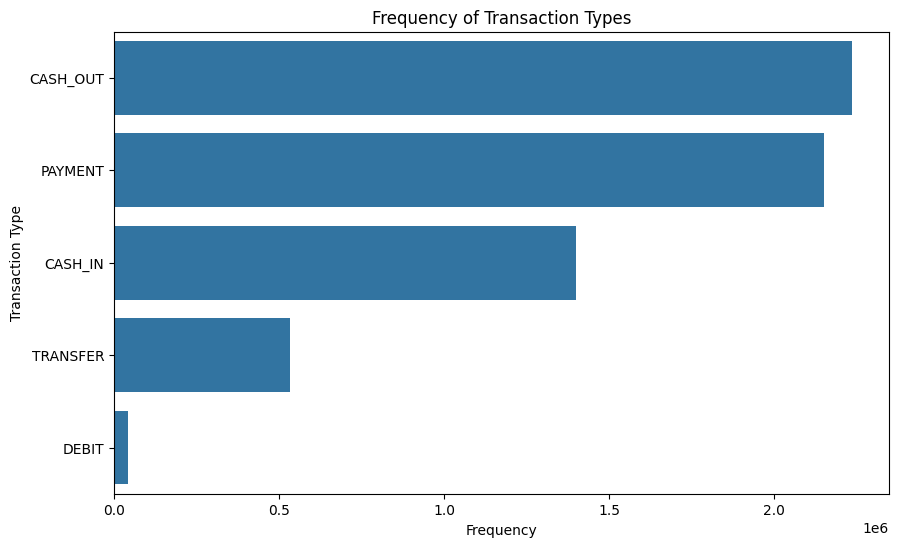

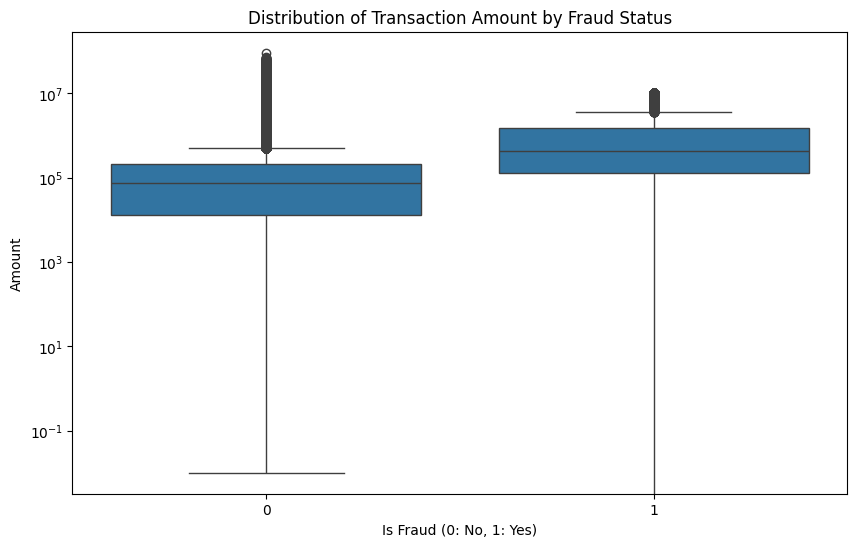


Correlation Matrix:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of 'amount'
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# 2. Count plot of 'type'
plt.figure(figsize=(10, 6))
sns.countplot(y='type', data=df, order = df['type'].value_counts().index)
plt.title('Frequency of Transaction Types')
plt.xlabel('Frequency')
plt.ylabel('Transaction Type')
plt.show()

# 3. Box plot of 'amount' for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Distribution of Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud (0: No, 1: Yes)')
plt.ylabel('Amount')
plt.yscale('log') # Use log scale due to large range of amounts
plt.show()

# 4. Correlation matrix for numerical features
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
print("\nCorrelation Matrix:")
display(correlation_matrix)

## Interpret results

### Subtask:
Interpret the findings from the analysis and summarize key insights about the fraud data.


## Feature engineering (optional)

### Subtask:
Create new features that could be helpful for detecting fraud.


**Reasoning**:
Create the new features as instructed and display the head of the dataframe to verify.



In [ ]:
# Convert balance columns to numeric, coercing errors
df['oldbalanceOrg'] = pd.to_numeric(df['oldbalanceOrg'], errors='coerce')
df['newbalanceOrig'] = pd.to_numeric(df['newbalanceOrig'], errors='coerce')
df['oldbalanceDest'] = pd.to_numeric(df['oldbalanceDest'], errors='coerce')
df['newbalanceDest'] = pd.to_numeric(df['newbalanceDest'], errors='coerce')


# Drop rows where conversion resulted in NaN (if any)
df.dropna(subset=['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], inplace=True)


df['hour'] = df['step'] % 24
df['day_of_week'] = (df['step'] // 24) % 7
df['balance_change_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_change_dest'] = df['oldbalanceDest'] - df['newbalanceDest']
df['is_cash_out_transfer'] = df['type'].isin(['CASH_OUT', 'TRANSFER']).astype(int)

display(df.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day_of_week,balance_change_orig,balance_change_dest,is_cash_out_transfer
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0,9839.64,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0,1864.28,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0,181.00,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,181.00,21182.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0,11668.14,0.0,0


## Summary:

### Data Analysis Key Findings

*   The dataset contains 341,829 rows and 11 columns, with a mix of integer, object, and float data types.
*   A small number of missing values (1) were identified in the `nameDest`, `oldbalanceDest`, `newbalanceDest`, `isFraud`, and `isFlaggedFraud` columns.
*   The distribution of transaction amounts is heavily skewed towards smaller values.
*   'CASH\_OUT' and 'PAYMENT' are the most frequent transaction types.
*   Fraudulent transactions generally involve larger amounts compared to non-fraudulent ones.
*   The correlation matrix showed a weak positive correlation between `amount` and `isFraud`.
*   `oldbalanceOrg` and `newbalanceOrig` are highly correlated, as are `oldbalanceDest` and `newbalanceDest`.
*   `oldbalanceOrg`, `newbalanceDest`, and `oldbalanceDest` showed some correlation with `isFraud`.
*   New features such as `hour`, `day_of_week`, `balance_change_orig`, `balance_change_dest`, and `is_cash_out_transfer` were successfully created.

### Insights or Next Steps

*   The difference in amount distribution between fraudulent and non-fraudulent transactions is a key indicator for fraud detection.
*   Changes in account balances appear to be related to fraudulent activities and could be valuable features for modeling.
*   Further analysis could explore the relationship between the newly engineered features and fraudulent transactions.
*   Consider building a classification model using the preprocessed data and engineered features to predict fraudulent transactions.
